# Imports and stream setup

In [1]:
from capymoa.cluster import Clustream_with_kmeans as WithKmeans
from capymoa.stream.generator import RandomRBFGeneratorDrift
from capymoa.cluster.evaluation import online_evaluation_clustering
from capymoa.cluster.visualization import plot_clustering_state
import pandas as pd

stream = RandomRBFGeneratorDrift(
    number_of_attributes=2,
    number_of_centroids=10,
    number_of_drifting_centroids=1,
    magnitude_of_change=0.001,
)
# clustream = WithKmeans(
#     schema=stream.get_schema(),
#     time_window=1000,
#     max_num_kernels=25,
#     kernel_radi_factor=2,
#     k_option=5,
# )
# result = online_evaluation_clustering(stream, clustream, update_interval=100, max_instances=2000)

# Clustering algorithms test

## BICO

In [2]:
from capymoa.cluster import BICO
bico = BICO(
	schema=stream.get_schema(),
	num_clusters=5,
	num_dimensions=2,
)
resultBICO = online_evaluation_clustering(stream, bico, update_interval=100, max_instances=2000)

0.9135377571157244,0.5293194010129683,?, - 0.9135377571157244,0.5293194010129683,class1,
Line skipped because line dimension is 3 instead of 2
1.0048369815257463,-0.08407087102492769,?, - 1.0048369815257463,-0.08407087102492769,class2,
Line skipped because line dimension is 3 instead of 2
0.13310526052712615,0.7302960273345241,?, - 0.13310526052712615,0.7302960273345241,class1,
Line skipped because line dimension is 3 instead of 2
0.6147594049231799,0.2622097242059067,?, - 0.6147594049231799,0.2622097242059067,class1,
Line skipped because line dimension is 3 instead of 2
-0.23244354606155612,0.6715959547470761,?, - -0.23244354606155612,0.6715959547470761,class1,
Line skipped because line dimension is 3 instead of 21.4897030002948448,-1.8381363819163203,?, - 1.4897030002948448,-1.8381363819163203,class1,

Line skipped because line dimension is 3 instead of 2
0.7377277269526193,0.41353544579955265,?, - 0.7377277269526193,0.41353544579955265,class1,
0.5640102547132694,-0.24010053675578008

java.lang.IndexOutOfBoundsException: java.lang.IndexOutOfBoundsException: Index 0 out of bounds for length 0

## CluStream With Kmeans

In [2]:
from capymoa.cluster import Clustream_with_kmeans as WithKmeans

wkm = WithKmeans(
	schema=stream.get_schema()
)
resultWKM = online_evaluation_clustering(stream, wkm, update_interval=100, max_instances=2000)
dic = {
    'Silhouette with past window': resultWKM.silhouette_past(),
    'Silhouette with future window': resultWKM.silhouette_future(),
    'SSQ with past window': resultWKM.ssq_past(),
    'SSQ with future window': resultWKM.ssq_future(),
    'BSS with past window': resultWKM.bss_past(),
    'BSS with future window': resultWKM.bss_future()
}
result_df = pd.DataFrame(dic)
result_df

,Silhouette with past window,Silhouette with future window,SSQ with past window,SSQ with future window,BSS with past window,BSS with future window
0,0.420516,0.436239,9.677623,16.982529,21.723224,19.300814
1,0.468145,0.544021,15.430741,9.838148,21.175321,28.037294
2,0.527987,0.418213,9.540887,17.710781,27.891810,21.088243
3,0.478874,0.356327,15.988896,8.336882,24.294702,25.368234
4,0.433346,0.461079,7.069662,16.990786,25.950396,30.396549
5,0.497311,0.376103,17.591988,17.401855,29.215164,32.858762
6,0.420870,0.358681,16.283400,15.904109,35.165120,25.693823
7,0.257440,0.461779,17.890388,15.404277,22.672964,30.908487
8,0.426119,0.370241,12.473248,19.731562,24.251749,26.343837
9,0.439048,0.463531,17.572939,14.301931,40.200343,35.582522


## CluStream

In [3]:
from capymoa.cluster import Clustream

clustream = Clustream(
	schema=stream.get_schema()
)
resultClustream = online_evaluation_clustering(stream, clustream, update_interval=100, max_instances=2000)
dic = {
    'Silhouette with past window': resultClustream.silhouette_past(),
    'Silhouette with future window': resultClustream.silhouette_future(),
    'SSQ with past window': resultClustream.ssq_past(),
    'SSQ with future window': resultClustream.ssq_future(),
    'BSS with past window': resultClustream.bss_past(),
    'BSS with future window': resultClustream.bss_future()
}
result_df = pd.DataFrame(dic)
result_df

,Silhouette with past window,Silhouette with future window,SSQ with past window,SSQ with future window,BSS with past window,BSS with future window
0,0.617646,0.549180,0.231865,2.373430,28.039096,29.625196
1,0.683637,0.440908,0.189119,1.318736,37.793852,31.043314
2,0.565724,0.529680,0.215358,3.241872,33.502661,40.484260
3,0.558695,0.413293,0.306094,1.040567,42.893578,31.575762
4,0.472403,0.465177,0.324292,2.027740,32.326753,48.742770
5,0.540133,0.458387,0.365370,1.358265,50.691830,48.143914
6,0.444160,0.452441,0.590317,1.210876,45.644153,34.889548
7,0.434876,0.450785,0.560939,0.670882,34.594343,27.861526
8,0.447161,0.458318,0.438194,1.302981,29.434777,43.380134
9,0.519143,0.515864,0.592020,1.468937,44.593206,36.752807


## ClusTree

In [4]:
from capymoa.cluster import ClusTree

clustree = ClusTree(
	schema=stream.get_schema()
)
resultClustree = online_evaluation_clustering(stream, clustree, update_interval=100, max_instances=2000)
dic = {
	'Silhouette with past window': resultClustree.silhouette_past(),
	'Silhouette with future window': resultClustree.silhouette_future(),
	'SSQ with past window': resultClustree.ssq_past(),
	'SSQ with future window': resultClustree.ssq_future(),
	'BSS with past window': resultClustree.bss_past(),
	'BSS with future window': resultClustree.bss_future()
}
result_df = pd.DataFrame(dic)
result_df

,Silhouette with past window,Silhouette with future window,SSQ with past window,SSQ with future window,BSS with past window,BSS with future window
0,1.000000,0.637932,9.894021e-31,2.261914,28.612164,30.452912
1,1.000000,0.718564,5.984376e-31,1.167454,39.465082,31.227615
2,1.000000,0.758603,3.486054e-31,2.943589,34.365965,40.730613
3,1.000000,0.776259,4.081046e-31,0.733626,43.627898,31.292993
4,1.000000,0.766687,4.152907e-31,1.553247,31.811948,48.546882
5,1.000000,0.836460,5.955577e-31,0.991549,50.532731,46.931936
6,1.000000,0.735860,6.368208e-31,0.741513,44.949727,36.023112
7,1.000000,0.910245,6.009864e-31,0.253834,35.950808,29.853511
8,1.000000,0.819299,4.085501e-31,0.695006,32.096190,46.787342
9,0.865974,0.835465,1.614390e-01,1.275438,48.373537,40.484160


## CobWeb

In [5]:
from capymoa.cluster import CobWeb
cobweb = CobWeb(
	schema=stream.get_schema()
)
resultCobweb = online_evaluation_clustering(stream, cobweb, update_interval=100, max_instances=2000)
dic = {
	'Silhouette with past window': resultCobweb.silhouette_past(),
	'Silhouette with future window': resultCobweb.silhouette_future(),
	'SSQ with past window': resultCobweb.ssq_past(),
	'SSQ with future window': resultCobweb.ssq_future(),
	'BSS with past window': resultCobweb.bss_past(),
	'BSS with future window': resultCobweb.bss_future()
}
result_df = pd.DataFrame(dic)
result_df

java.lang.UnsupportedOperationException: java.lang.UnsupportedOperationException: Not yet implemented

## ConfStream

In [6]:
from capymoa.cluster import ConfStream
confstream = ConfStream(
	schema=stream.get_schema()
)
resultConfstream = online_evaluation_clustering(stream, confstream, update_interval=100, max_instances=2000)
dic = {
	'Silhouette with past window': resultConfstream.silhouette_past(),
	'Silhouette with future window': resultConfstream.silhouette_future(),
	'SSQ with past window': resultConfstream.ssq_past(),
	'SSQ with future window': resultConfstream.ssq_future(),
	'BSS with past window': resultConfstream.bss_past(),
	'BSS with future window': resultConfstream.bss_future()
}
result_df = pd.DataFrame(dic)
result_df

java.io.FileNotFoundException: settings.json (No such file or directory)
	at java.base/java.io.FileInputStream.open0(Native Method)
	at java.base/java.io.FileInputStream.open(FileInputStream.java:219)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:157)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:112)
	at java.base/java.io.FileReader.<init>(FileReader.java:60)
	at moa.clusterers.meta.EnsembleClustererAbstract.prepareForUseImpl(EnsembleClustererAbstract.java:633)
	at moa.options.AbstractOptionHandler.prepareForUse(AbstractOptionHandler.java:86)
	at moa.options.AbstractOptionHandler.prepareForUse(AbstractOptionHandler.java:74)


java.lang.NullPointerException: java.lang.NullPointerException

## DenStream

In [7]:
from capymoa.cluster import Denstream_with_dbscan
denstream = Denstream_with_dbscan(
	schema=stream.get_schema()
)
resultDenstream = online_evaluation_clustering(stream, denstream, update_interval=100, max_instances=2000)
dic = {
	'Silhouette with past window': resultDenstream.silhouette_past(),
	'Silhouette with future window': resultDenstream.silhouette_future(),
	'SSQ with past window': resultDenstream.ssq_past(),
	'SSQ with future window': resultDenstream.ssq_future(),
	'BSS with past window': resultDenstream.bss_past(),
	'BSS with future window': resultDenstream.bss_future()
}
result_df = pd.DataFrame(dic)
result_df

ValueError: operands could not be broadcast together with shapes (0,) (2,) 

## DStream

In [8]:
from capymoa.cluster import DStream
dstream = DStream(
	schema=stream.get_schema()
)
resultDstream = online_evaluation_clustering(stream, dstream, update_interval=100, max_instances=2000)
dic = {
	'Silhouette with past window': resultDstream.silhouette_past(),
	'Silhouette with future window': resultDstream.silhouette_future(),
	'SSQ with past window': resultDstream.ssq_past(),
	'SSQ with future window': resultDstream.ssq_future(),
	'BSS with past window': resultDstream.bss_past(),
	'BSS with future window': resultDstream.bss_future()
}
result_df = pd.DataFrame(dic)
result_df

,Silhouette with past window,Silhouette with future window,SSQ with past window,SSQ with future window,BSS with past window,BSS with future window
0,-1.0,-1.0,101.244158,92.811525,74.221835,53.557240
1,-1.0,-1.0,92.811525,92.994914,53.557240,58.584385
2,-1.0,-1.0,92.994914,110.969967,58.584385,67.850004
3,-1.0,-1.0,110.969967,93.649785,67.850004,61.633726
4,-1.0,-1.0,93.649785,126.659768,61.633726,75.597392
5,-1.0,-1.0,126.659768,100.840644,75.597392,56.117255
6,-1.0,-1.0,100.840644,111.594151,56.117255,76.043027
7,-1.0,-1.0,111.594151,93.199643,76.043027,63.142241
8,-1.0,-1.0,93.199643,118.420324,63.142241,72.290858
9,-1.0,-1.0,118.420324,90.841358,72.290858,52.981402


## StreamKM++

In [9]:
from capymoa.cluster import StreamKM
streamkm = StreamKM(
	schema=stream.get_schema()
)
resultStreamkm = online_evaluation_clustering(stream, streamkm, update_interval=100, max_instances=2000)
dic = {
	'Silhouette with past window': resultStreamkm.silhouette_past(),
	'Silhouette with future window': resultStreamkm.silhouette_future(),
	'SSQ with past window': resultStreamkm.ssq_past(),
	'SSQ with future window': resultStreamkm.ssq_future(),
	'BSS with past window': resultStreamkm.bss_past(),
	'BSS with future window': resultStreamkm.bss_future()
}
result_df = pd.DataFrame(dic)
result_df

,Silhouette with past window,Silhouette with future window,SSQ with past window,SSQ with future window,BSS with past window,BSS with future window
0,0.451788,0.432099,10.082055,17.254979,28.209385,22.389249
1,0.444866,0.458992,14.442147,12.313502,23.947778,24.639890
2,0.469430,0.352018,11.393255,20.387506,24.061486,29.177908
3,0.370575,0.438608,19.078167,13.188573,27.543193,19.793335
4,0.419521,0.256942,10.299489,27.673104,18.086244,25.517913
5,0.377545,0.390317,20.782847,19.207098,26.302856,23.786456
6,0.392830,0.368774,18.121854,20.744476,24.908387,18.652201
7,0.369769,0.432575,20.021007,10.842277,17.736739,18.409551
8,0.434072,0.425505,10.765904,15.740951,18.281842,26.167809
9,0.422375,0.388400,15.422639,13.952148,27.014455,26.745760


# Visualization tests

Processed 100 instances.


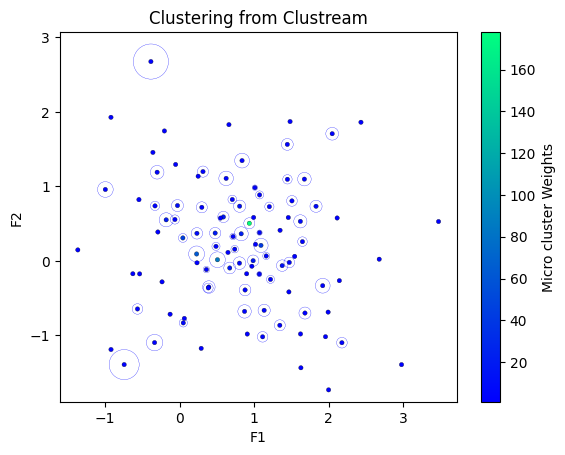

Processed 200 instances.


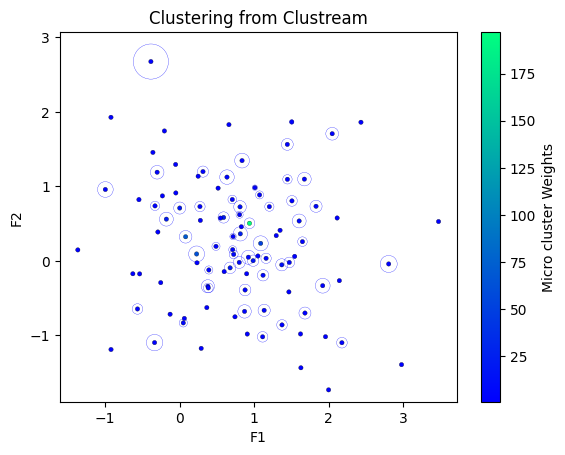

Processed 300 instances.


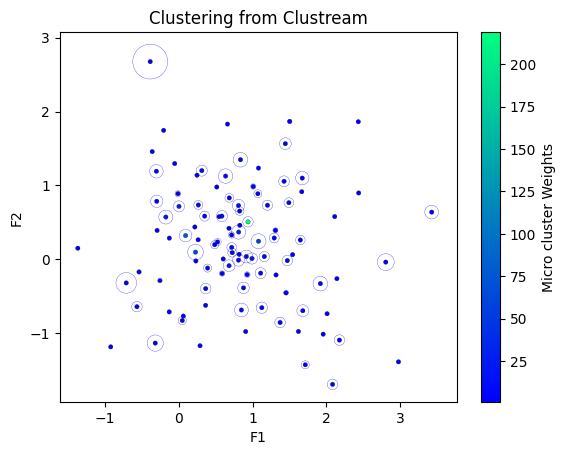

In [10]:
instancesSeen = 0
updateInterval = 100
while stream.has_more_instances() and instancesSeen < 300:
    instance = stream.next_instance()
    clustream.train(instance)
    instancesSeen += 1
    if instancesSeen % updateInterval == 0:
        print(f"Processed {instancesSeen} instances.")
        plot_clustering_state(clustream)
        # by default, plot_clustering_state only shows the image and does not save it

## 2. Using the Clustering Evaluator


In [11]:
from capymoa.cluster.evaluation import ClusteringEvaluator

In [12]:
stream = RandomRBFGeneratorDrift(
    number_of_attributes=2,
    number_of_centroids=10,
    number_of_drifting_centroids=1,
    magnitude_of_change=0.001,
)
clustream = WithKmeans(
    schema=stream.get_schema(),
    time_window=1000,
    max_num_kernels=25,
    kernel_radi_factor=2,
    k_option=5,
)
evaluator = ClusteringEvaluator(update_interval=100)

### 2.1 Plot the clustering state on demand

In [13]:
while stream.has_more_instances() and evaluator.get_instances_seen() < 1000:
    instance = stream.next_instance()
    clustream.train(instance)
    evaluator.update(clustream)
    instancesSeen = evaluator.get_instances_seen()
    # purposefully arbitrary number
    if instancesSeen == 157:
        # can also skip show and only save
        print(
            f"Processed {instancesSeen} instances. Saving the figure without showing it."
        )
        plot_clustering_state(
            clustream, show_fig=False, save_fig=True, figure_name="save_fig_dont_show"
        )

Processed 157 instances. Saving the figure without showing it.


### 2.2 Plot the clustering evolution (gif)

- Passing `clean_up=False` to the `plot_clustering_evolution` function will keep the intermediate figures used to create the gif.
- You need the `ClusteringEvaluator` to generate the gif.
- Default filename will be `<clusterer_name>_clustering_evolution.gif`

In [14]:
from capymoa.cluster.visualization import plot_clustering_evolution

plot_clustering_evolution(resultStreamkm, clean_up=True, frame_duration=1000)

GIF saved at StreamKM_clustering_evolution.gif


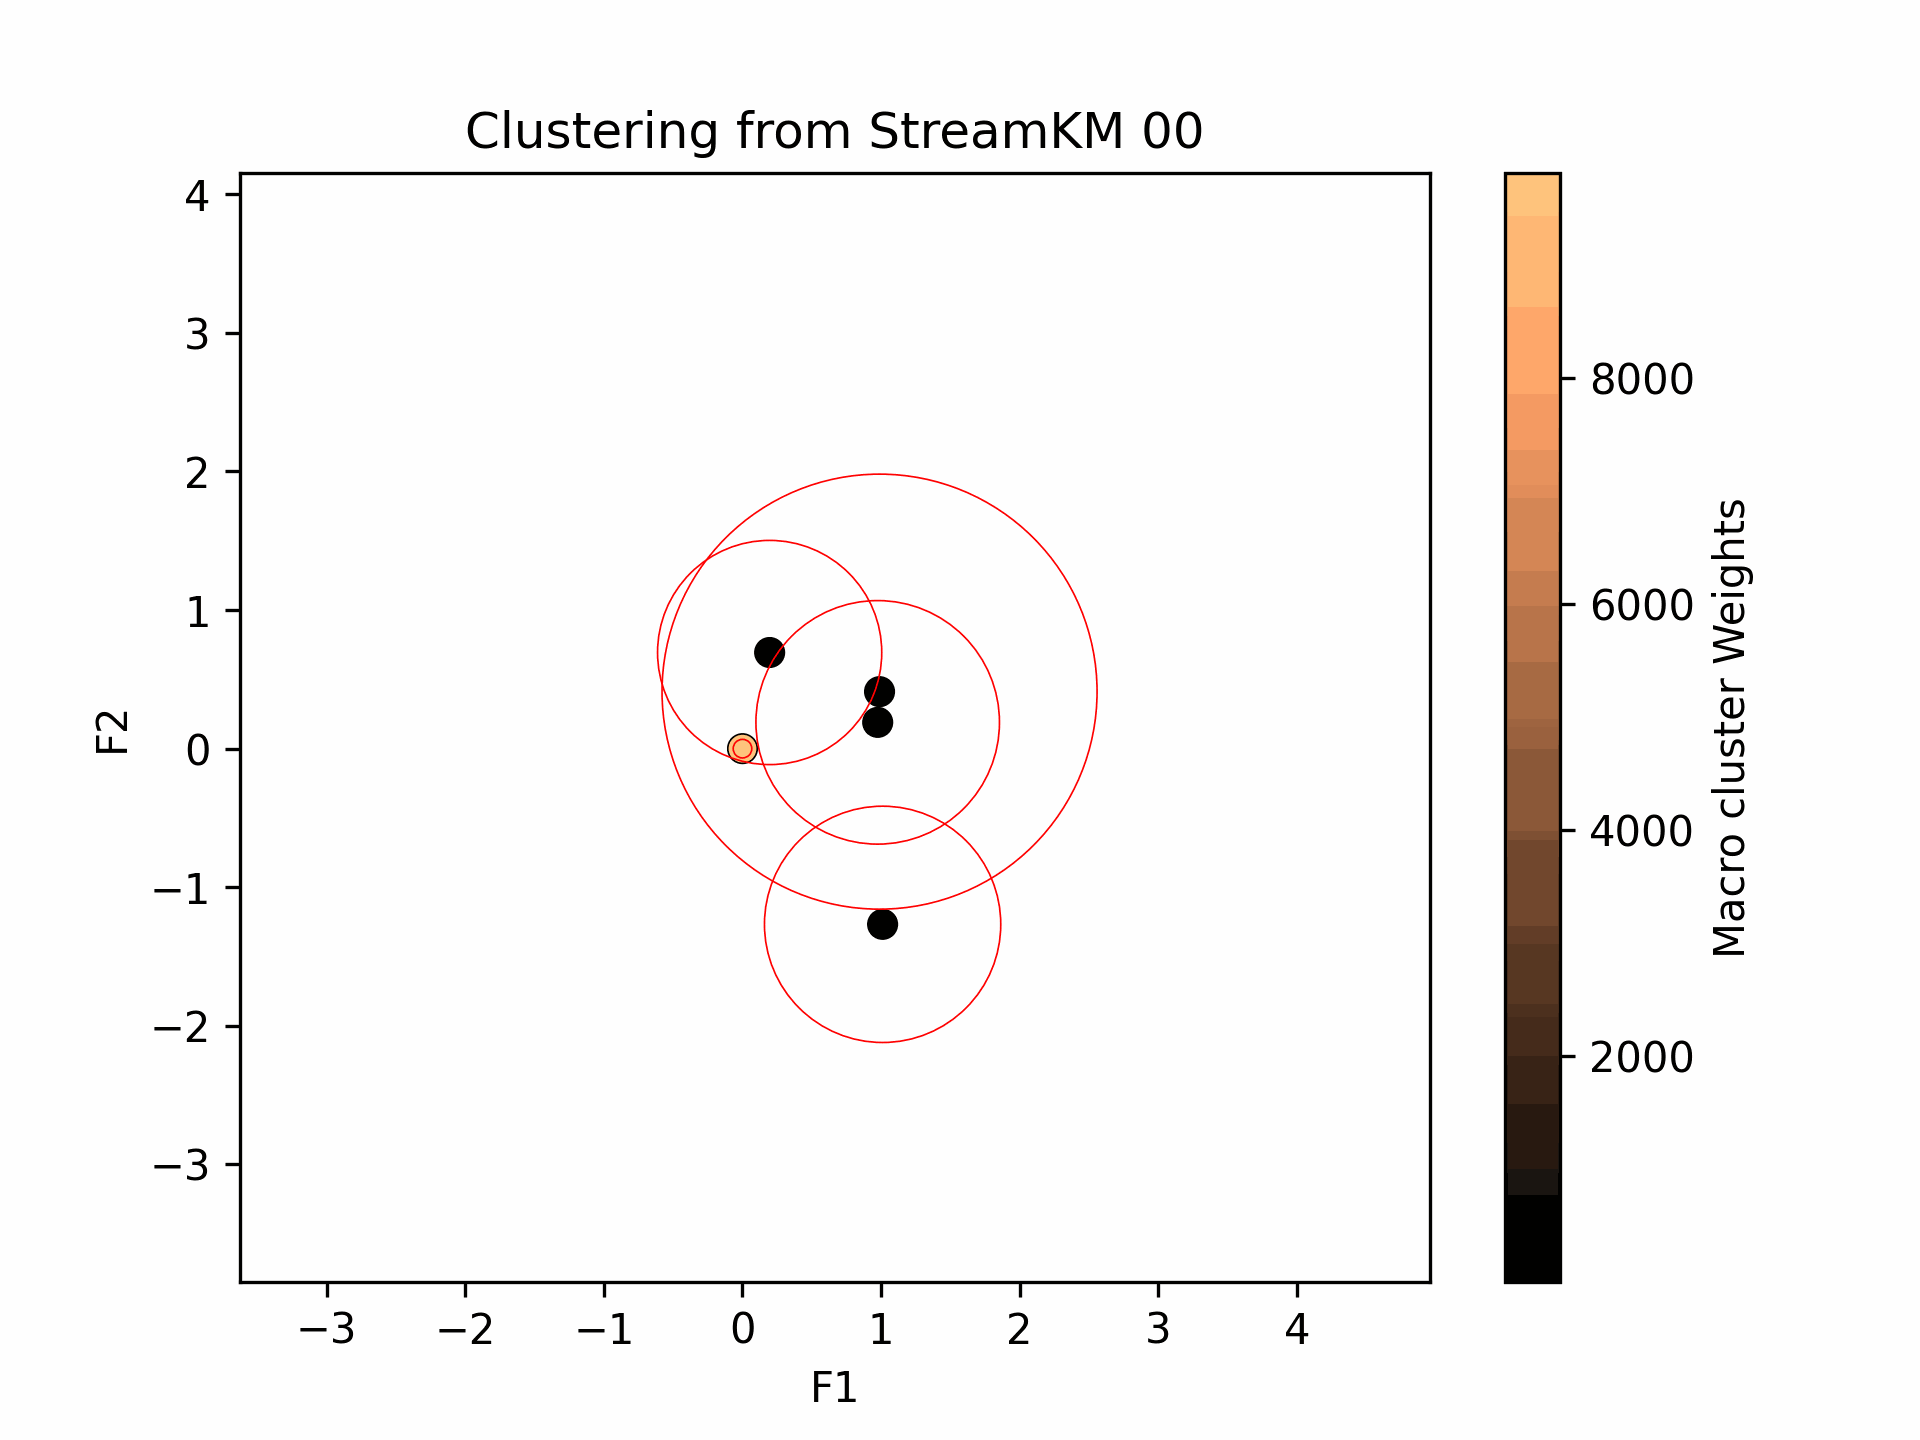

In [15]:
from IPython.display import Image

# Display the GIF
# Image(filename="./Clustream_with_Kmeans_clustering_evolution.gif")
Image(filename="./StreamKM_clustering_evolution.gif")